In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import numpy as np
from sklearn.metrics import confusion_matrix

from eye_dataset_v1 import *
from eye_model_v1 import *

/home/jovyan/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# plot model curves

In [2]:
def get_plots():
    fig,ax=plt.subplots(3,2,figsize=(12,10))

    plt.subplot(3,2,1)
    plt.plot(train_loss_list)
    y = min(train_loss_list)
    x = train_loss_list.index(y)
    plt.plot(x,y,'rx')
    plt.title(f'train loss vs epochs, min loss at epoch {x}: {y}')


    plt.subplot(3,2,2)
    plt.plot(val_loss_list)
    y = min(val_loss_list)
    x = val_loss_list.index(y)
    plt.plot(x,y,'rx')
    plt.title(f'val loss vs epochs, min loss at epoch {x}: {y}')


    plt.subplot(3,2,3)
    plt.plot(train_acc_list)
    y = max(train_acc_list)
    x = train_acc_list.index(y)
    plt.plot(x,y,'rx')
    plt.title(f'train acc vs epochs, max acc at epoch {x}: {y}')


    plt.subplot(3,2,4)
    plt.plot(val_acc_list)
    y = max(val_acc_list)
    x = val_acc_list.index(y)
    plt.plot(x,y,'rx')
    plt.title(f'val acc vs epochs, max acc at epoch {x}: {y}')


    plt.subplot(3,2,5)
    plt.plot(lr_list)
    plt.title(f'LR vs epochs')

    plt.subplot(3,2,6)
    plt.plot(train_time_list)
    plt.plot(val_time_list)
    plt.title(f'Train and val time taken vs epochs')


    plt.show()

921


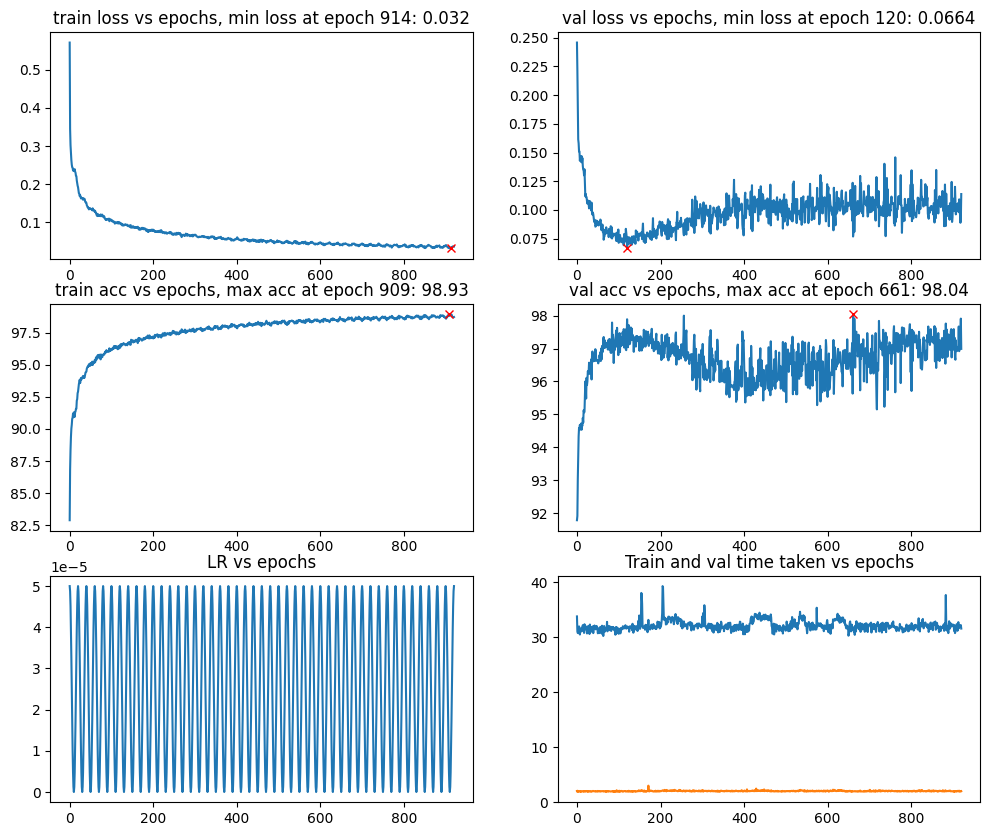

In [58]:
# output_folder = 'v2.6.1_test_2'
output_folder = 'v3.3.6'
resultsPath = f'/home/jovyan/data/aurora/ISO_L2_eye_mouth_blink/eye/train/result/{output_folder}/results.csv'

results_df = pd.read_csv(resultsPath)
results_df = results_df[results_df.val_conf_mat!='[]']

lr_list = results_df.lr.tolist()
train_loss_list = results_df.train_loss.tolist()
val_loss_list = results_df.val_loss.tolist()
train_acc_list = results_df.train_acc.tolist()
val_acc_list = results_df.val_acc.tolist()
train_time_list = results_df.train_time_taken.tolist()
val_time_list = results_df.val_time_taken.tolist()

print(len(results_df))
get_plots() 

# find other good epochs

In [33]:
def get_val_acc(x,label):
    cm = np.array(eval(x)).reshape((3,3))
    val_open_acc = round(cm[0,0]/sum(cm[0])*100,2)
    val_close_acc = round(cm[1,1]/sum(cm[1])*100,2)
    val_block_acc = round(cm[2,2]/sum(cm[2])*100,2)
    
    if label=='open':
        return val_open_acc
    elif label=='close':
        return val_close_acc
    else:
        return val_block_acc

In [34]:
results_df['open_val_acc']=results_df['val_conf_mat'].apply(lambda x: get_val_acc(x,'open'))
results_df['close_val_acc']=results_df['val_conf_mat'].apply(lambda x: get_val_acc(x,'close'))
results_df['block_val_acc']=results_df['val_conf_mat'].apply(lambda x: get_val_acc(x,'block'))
results_df.describe()

,epoch,lr,train_loss,val_loss,train_acc,val_acc,train_time_taken,val_time_taken,open_val_acc,close_val_acc,block_val_acc
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,101.000000,0.000025,0.123497,0.089144,95.486453,96.782660,31.759212,1.978867,98.585074,97.938916,95.188128
std,58.745213,0.000018,0.057664,0.025260,2.059553,0.940471,0.870890,0.089632,0.409139,0.890563,1.454246
min,0.000000,0.000000,0.075500,0.066400,82.880000,91.780000,30.240000,1.840000,96.740000,94.870000,86.370000
25%,50.500000,0.000010,0.088050,0.076300,95.010000,96.700000,31.425000,1.940000,98.385000,97.400000,95.060000
50%,101.000000,0.000025,0.103500,0.080300,96.210000,97.060000,31.710000,1.970000,98.710000,98.310000,95.450000
75%,151.500000,0.000045,0.135300,0.089200,96.810000,97.280000,31.975000,2.000000,98.880000,98.565000,95.910000
max,202.000000,0.000050,0.571100,0.245800,97.290000,97.890000,38.080000,2.990000,99.220000,99.390000,97.460000


In [35]:
# best open val acc epoch
results_df[results_df.open_val_acc==max(results_df.open_val_acc)]

,epoch,lr,train_loss,val_loss,train_acc,val_acc,train_time_taken,val_time_taken,val_conf_mat,open_val_acc,close_val_acc,block_val_acc
200,200.0,0.000050,0.0811,0.0861,97.05,96.95,31.87,2.03,"[2921, 2, 21, 6, 2909, 47, 174, 78, 4780]",99.22,98.21,94.99
201,201.0,0.000049,0.0786,0.0834,97.18,97.07,31.94,2.00,"[2921, 2, 21, 6, 2935, 21, 176, 88, 4768]",99.22,99.09,94.75


In [36]:
# best close val acc epoch
results_df[results_df.close_val_acc==max(results_df.close_val_acc)]

,epoch,lr,train_loss,val_loss,train_acc,val_acc,train_time_taken,val_time_taken,val_conf_mat,open_val_acc,close_val_acc,block_val_acc
182,182.0,0.000045,0.0798,0.0928,97.14,97.01,31.99,1.96,"[2915, 4, 25, 8, 2944, 10, 193, 80, 4759]",99.01,99.39,94.57


In [37]:
# best block val acc epoch
results_df[results_df.block_val_acc==max(results_df.block_val_acc)]

,epoch,lr,train_loss,val_loss,train_acc,val_acc,train_time_taken,val_time_taken,val_conf_mat,open_val_acc,close_val_acc,block_val_acc
84,84.0,0.000033,0.1102,0.0751,95.95,97.79,31.48,1.97,"[2905, 6, 33, 6, 2892, 64, 94, 34, 4904]",98.68,97.64,97.46


In [10]:
[120,201,182,84]

[845, 885, 816, 529]

In [10]:
# can adjust thre accordinly if needed

open_thre,close_thre,block_thre = 92.,97,90

current = results_df[
    (results_df.open_val_acc>open_thre) &
    (results_df.close_val_acc>close_thre) &
    (results_df.block_val_acc>block_thre) 
]

# current
# current.sort_values(by='close_val_acc',ascending=False)
current

,epoch,lr,train_loss,val_loss,train_acc,val_acc,train_time_taken,val_time_taken,val_conf_mat,open_val_acc,close_val_acc,block_val_acc
31,31.0,2.447174e-07,0.2480,0.1612,90.78,94.49,30.47,1.85,"[2884, 15, 45, 8, 2876, 78, 179, 257, 4253]",97.96,97.10,90.70
35,35.0,5.000000e-06,0.2398,0.1655,91.09,94.73,30.38,1.84,"[2884, 18, 42, 8, 2885, 69, 145, 275, 4269]",97.96,97.40,91.04
36,36.0,6.545085e-06,0.2395,0.1567,90.97,94.42,30.38,1.77,"[2889, 15, 40, 6, 2874, 82, 208, 240, 4241]",98.13,97.03,90.45
38,38.0,9.045085e-06,0.2301,0.1420,91.42,95.44,29.82,1.90,"[2879, 14, 51, 8, 2883, 71, 102, 237, 4350]",97.79,97.33,92.77
39,39.0,9.755283e-06,0.2255,0.1391,91.52,95.67,30.40,1.92,"[2885, 13, 46, 10, 2879, 73, 100, 217, 4372]",98.00,97.20,93.24
...,...,...,...,...,...,...,...,...,...,...,...,...
441,441.0,9.755283e-06,0.1033,0.0617,96.29,97.65,29.70,1.90,"[2909, 4, 31, 6, 2892, 64, 82, 63, 4544]",98.81,97.64,96.91
442,442.0,9.045085e-06,0.1068,0.0688,96.15,97.14,29.31,1.91,"[2920, 3, 21, 6, 2911, 45, 143, 86, 4460]",99.18,98.28,95.12
443,443.0,7.938926e-06,0.1053,0.0694,96.15,97.54,29.73,1.86,"[2917, 5, 22, 6, 2909, 47, 80, 101, 4508]",99.08,98.21,96.14
444,444.0,6.545085e-06,0.1010,0.0661,96.31,97.76,29.02,1.86,"[2914, 3, 27, 6, 2914, 42, 82, 78, 4529]",98.98,98.38,96.59


# single eye - get model softmax scores

In [12]:
# load data
csvPath = '/home/jovyan/data/aurora/ISO_L2_eye_mouth_blink/eye/data/v3.0/v3.0_test_single.csv'
# csvPath = "/home/jovyan/data/aurora/ISO_L2_eye_mouth_blink/eye/data/v3.2/v3.2.2_full.csv"  
input_dim = 80
seed = 0
balance = False
preload = True

test_df = pd.read_csv(csvPath)
test_dataset = Eye_Dataset(csvPath, data_type = '', input_dim = input_dim, seed = seed, balance = balance, augmentation = False, preload = preload)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

Preload images...


100%|██████████| 3388/3388 [00:08<00:00, 411.40it/s] 


device: cuda


In [20]:
test_df.label.value_counts()

label
block    1288
open     1115
close     985
Name: count, dtype: int64

In [38]:
output_folder

'v3.3.6'

In [39]:
# load model

epochs = [120,201,182,84]
model_key = 'mobilenetv3_small_050'

for epoch in epochs:
    model_path = f'/home/jovyan/data/aurora/ISO_L2_eye_mouth_blink/eye/train/result/{output_folder}/weights/epoch{epoch}.pt' 
    try: 
        # setup model - from scratch or load model for finetune
        model = Eye_Net(
            model_key = model_key,
            in_channel = 3
        ).to(device)
        model.load_state_dict(torch.load(os.path.join(model_path), map_location = device))
        _ = model.eval()
        print('model loaded succesfully')

        # start inference
        softmax_output_list = []
        for i,(image,label) in enumerate(tqdm(test_dataset)):
            logits = model(image.unsqueeze(0).to(device))
            logits = logits.cpu().detach()
            softmax_output = nn.Softmax(dim=1)(logits)
            softmax_output = [round(x,5) for x in softmax_output.numpy()[0].tolist()]
            softmax_output_list.append(softmax_output)

        # save softmax output to test_df
        model_softmax_col_name = f'{output_folder}_epoch{epoch}_softmax_score'
        test_df[model_softmax_col_name]=softmax_output_list
    except Exception as e:
        print(epoch,e)
        
        
test_df.head()

model loaded succesfully


100%|██████████| 3388/3388 [00:28<00:00, 119.24it/s]


model loaded succesfully


100%|██████████| 3388/3388 [00:28<00:00, 120.92it/s]


model loaded succesfully


100%|██████████| 3388/3388 [00:28<00:00, 120.80it/s]


model loaded succesfully


100%|██████████| 3388/3388 [00:27<00:00, 122.03it/s]


,index2,glasses,label,index1,image_path,split_type,bbox,source,person_name,which_side,...,v3.3.5_epoch816_softmax_score,v3.3.5_epoch529_softmax_score,v3.3.4.1_epoch568_softmax_score,v3.3.4.1_epoch966_softmax_score,v3.3.4.1_epoch987_softmax_score,v3.3.4.1_epoch529_softmax_score,v3.3.6_epoch120_softmax_score,v3.3.6_epoch201_softmax_score,v3.3.6_epoch182_softmax_score,v3.3.6_epoch84_softmax_score
0,20210,1.0,open,11459.0,/home/jovyan/data/vol_1/liveness_files/Aurora ...,test,"[139, 227, 215, 303]",new_liveness_data,NaN,left,...,"[0.9997, 2e-05, 0.00028]","[0.99898, 4e-05, 0.00097]","[0.99989, 0.0, 0.0001]","[0.9999, 0.0, 9e-05]","[0.9999, 0.0, 0.0001]","[0.99988, 0.0, 0.00012]","[0.99989, 0.0, 0.00011]","[0.99983, 1e-05, 0.00016]","[0.99992, 0.0, 7e-05]","[0.99994, 0.0, 6e-05]"
1,20211,1.0,open,11460.0,/home/jovyan/data/vol_1/liveness_files/Aurora ...,test,"[137, 282, 223, 368]",new_liveness_data,NaN,left,...,"[0.95456, 0.03311, 0.01233]","[0.92514, 0.04223, 0.03264]","[0.98492, 0.01145, 0.00363]","[0.99421, 0.00381, 0.00198]","[0.99273, 0.00473, 0.00255]","[0.98383, 0.01197, 0.00421]","[0.98276, 0.01282, 0.00442]","[0.99138, 0.00521, 0.00341]","[0.99082, 0.00539, 0.00379]","[0.96989, 0.02571, 0.00441]"
2,20212,1.0,open,11461.0,/home/jovyan/data/vol_1/liveness_files/Aurora ...,test,"[127, 219, 212, 304]",new_liveness_data,NaN,left,...,"[0.9997, 0.0, 0.0003]","[0.99906, 0.0, 0.00094]","[0.99995, 0.0, 5e-05]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.99989, 0.0, 0.00011]","[0.99986, 0.0, 0.00014]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.99969, 0.0, 0.00031]"
3,20213,1.0,open,11462.0,/home/jovyan/data/vol_1/liveness_files/Aurora ...,test,"[124, 231, 198, 305]",new_liveness_data,NaN,left,...,"[0.98503, 0.00126, 0.01372]","[0.96483, 0.00234, 0.03283]","[0.99613, 0.00029, 0.00358]","[0.99936, 0.00023, 0.00041]","[0.99931, 0.00022, 0.00046]","[0.99566, 0.00033, 0.00401]","[0.99661, 0.00015, 0.00323]","[0.99969, 7e-05, 0.00025]","[0.99974, 4e-05, 0.00023]","[0.99343, 0.00051, 0.00607]"
4,20214,1.0,open,11463.0,/home/jovyan/data/vol_1/liveness_files/Aurora ...,test,"[144, 269, 221, 346]",new_liveness_data,NaN,left,...,"[0.94773, 0.0002, 0.05208]","[0.92608, 0.00017, 0.07375]","[0.90867, 0.00035, 0.09098]","[0.92802, 0.00035, 0.07163]","[0.92292, 0.00038, 0.07671]","[0.92111, 0.00033, 0.07856]","[0.84443, 0.00074, 0.15483]","[0.9355, 0.0002, 0.06429]","[0.94746, 0.00016, 0.05239]","[0.94913, 0.00015, 0.05072]"


In [40]:
test_df.to_csv(csvPath,index=False)

# single eye argmax prediction 

In [47]:
from sklearn.metrics import confusion_matrix

mapping = {
    'open':0,
    'close':1,
    'block':2
}

reverse_mapping = {v:k for k,v in mapping.items()}

def get_one_eye_argmax_prediction(eye_score):
    return reverse_mapping[np.argmax(eye_score)]

def get_one_eye_prediction(eye_score,close_thre,block_thre):
    if eye_score[2] > block_thre:
        return 'block'
    elif eye_score[1] > close_thre:
        return 'close'
    else:
        return 'open'

In [43]:
test_df.columns[-20:]

Index(['v2.6.1_test_2_epoch403_softmax_score',
       'v2.6.1_test_2_epoch441_softmax_score',
       'v2.6.1_test_2_epoch399_softmax_score',
       'v2.6.1_test_2_epoch340_softmax_score', 'v3.3.4_epoch845_softmax_score',
       'v3.3.4_epoch568_softmax_score', 'v3.3.4_epoch816_softmax_score',
       'v3.3.4_epoch529_softmax_score', 'v3.3.5_epoch845_softmax_score',
       'v3.3.5_epoch885_softmax_score', 'v3.3.5_epoch816_softmax_score',
       'v3.3.5_epoch529_softmax_score', 'v3.3.4.1_epoch568_softmax_score',
       'v3.3.4.1_epoch966_softmax_score', 'v3.3.4.1_epoch987_softmax_score',
       'v3.3.4.1_epoch529_softmax_score', 'v3.3.6_epoch120_softmax_score',
       'v3.3.6_epoch201_softmax_score', 'v3.3.6_epoch182_softmax_score',
       'v3.3.6_epoch84_softmax_score'],
      dtype='object')

In [44]:
columns = [
    'v3.3.6_epoch120_softmax_score',
       'v3.3.6_epoch201_softmax_score', 'v3.3.6_epoch182_softmax_score',
       'v3.3.6_epoch84_softmax_score'
]

In [45]:
# argmax prediction

d = {
    'column':[],
    'dataset':[],
    'open':[],
    'close':[],
    'block':[]
}

for column in columns:
    print(column)

    # # full dataset
    scores = [x for x in test_df[column].tolist()]
    # scores = [eval(x) for x in test_df[column].tolist()]
    labels = [x for x in test_df['label'].tolist()]
    predictions=[]
    for score in tqdm(scores):
        predictions.append(get_one_eye_argmax_prediction(score))
    labels = [mapping[x] for x in labels]
    predictions = [mapping[x] for x in predictions]
    # cm = confusion_matrix(labels,predictions)
    # acc_open = round(cm[0,0]/sum(cm[0]) *100 , 2)
    # acc_close = round(cm[1,1]/sum(cm[1]) *100 , 2)
    # acc_block = round(cm[2,2]/sum(cm[2]) *100 , 2)
    # print(f'test acc-open, test acc-close, test acc-block\n{acc_open}, {acc_close}, {acc_block}')
    # print(f'confusion matrix:\n{cm}')
    test_df['predictions']=predictions
    # d['column'].append(column)
    # d['dataset'].append('full')
    # d['open'].append(f'{acc_open}% {cm[0,0]}/{sum(cm[0])}')
    # d['close'].append(f'{acc_close}% {cm[1,1]}/{sum(cm[1])}')
    # d['block'].append(f'{acc_block}% {cm[2,2]}/{sum(cm[2])}')

    # original data
    label = ''
    data = 'iso_l2_data_collection'
    current = test_df[
        (test_df.label!=label) &
        (test_df.source!=data) 
    ]
    preds = current.predictions.tolist()
    labs = [mapping[x] for x in current.label.tolist()]
    cm = confusion_matrix(labs,preds)
    acc_open = round(cm[0,0]/sum(cm[0]) *100 , 2)
    acc_close = round(cm[1,1]/sum(cm[1]) *100 , 2)
    acc_block = round(cm[2,2]/sum(cm[2]) *100 , 2)
    print(f'test acc-open, test acc-close, test acc-block\n{acc_open}%, {acc_close}%, {acc_block}% ')
    print(f'confusion matrix:\n{cm}')
    # test_df['predictions']=predictions
    d['column'].append(column)
    d['dataset'].append('original')
    d['open'].append(f'{acc_open}% {cm[0,0]}/{sum(cm[0])}')
    d['close'].append(f'{acc_close}% {cm[1,1]}/{sum(cm[1])}')
    d['block'].append(f'{acc_block}% {cm[2,2]}/{sum(cm[2])}')

    # new iso l2 data
    label = ''
    data = 'iso_l2_data_collection'
    current = test_df[
        (test_df.label!=label) &
        (test_df.source==data) 
    ]
    preds = current.predictions.tolist()
    labs = [mapping[x] for x in current.label.tolist()]
    cm = confusion_matrix(labs,preds)
    acc_open = round(cm[0,0]/sum(cm[0]) *100 , 2)
    acc_close = round(cm[1,1]/sum(cm[1]) *100 , 2)
    acc_block = round(cm[2,2]/sum(cm[2]) *100 , 2)
    print(f'test acc-open, test acc-close, test acc-block\n{acc_open}%, {acc_close}%, {acc_block}% ')
    print(f'confusion matrix:\n{cm}')
    print()
    # test_df['predictions']=predictions
    d['column'].append(column)
    d['dataset'].append('new')
    d['open'].append(f'{acc_open}% {cm[0,0]}/{sum(cm[0])}')
    d['close'].append(f'{acc_close}% {cm[1,1]}/{sum(cm[1])}')
    d['block'].append(f'{acc_block}% {cm[2,2]}/{sum(cm[2])}')

v3.3.6_epoch120_softmax_score


100%|██████████| 3388/3388 [00:00<00:00, 245691.45it/s]


test acc-open, test acc-close, test acc-block
98.92%, 97.96%, 93.03% 
confusion matrix:
[[920   3   7]
 [  3 768  13]
 [ 54  11 868]]
test acc-open, test acc-close, test acc-block
95.68%, 71.14%, 85.07% 
confusion matrix:
[[177   0   8]
 [  7 143  51]
 [ 50   3 302]]

v3.3.6_epoch201_softmax_score


100%|██████████| 3388/3388 [00:00<00:00, 242604.26it/s]


test acc-open, test acc-close, test acc-block
99.46%, 97.96%, 91.64% 
confusion matrix:
[[925   2   3]
 [  8 768   8]
 [ 70   8 855]]
test acc-open, test acc-close, test acc-block
98.92%, 85.07%, 78.03% 
confusion matrix:
[[183   0   2]
 [  8 171  22]
 [ 75   3 277]]

v3.3.6_epoch182_softmax_score


100%|██████████| 3388/3388 [00:00<00:00, 241638.93it/s]


test acc-open, test acc-close, test acc-block
99.46%, 98.85%, 91.1% 
confusion matrix:
[[925   2   3]
 [  5 775   4]
 [ 73  10 850]]
test acc-open, test acc-close, test acc-block
98.92%, 85.07%, 79.44% 
confusion matrix:
[[183   0   2]
 [  8 171  22]
 [ 70   3 282]]

v3.3.6_epoch84_softmax_score


100%|██████████| 3388/3388 [00:00<00:00, 237539.11it/s]

test acc-open, test acc-close, test acc-block
98.82%, 98.85%, 92.82% 
confusion matrix:
[[919   3   8]
 [  1 775   8]
 [ 56  11 866]]
test acc-open, test acc-close, test acc-block
97.3%, 75.12%, 87.89% 
confusion matrix:
[[180   0   5]
 [  6 151  44]
 [ 39   4 312]]



In [46]:
current = pd.DataFrame.from_dict(d).sort_values(by='dataset')
current = current.sort_values(by='close',ascending=False)
current

,column,dataset,open,close,block
4,v3.3.6_epoch182_softmax_score,original,99.46% 925/930,98.85% 775/784,91.1% 850/933
6,v3.3.6_epoch84_softmax_score,original,98.82% 919/930,98.85% 775/784,92.82% 866/933
0,v3.3.6_epoch120_softmax_score,original,98.92% 920/930,97.96% 768/784,93.03% 868/933
2,v3.3.6_epoch201_softmax_score,original,99.46% 925/930,97.96% 768/784,91.64% 855/933
3,v3.3.6_epoch201_softmax_score,new,98.92% 183/185,85.07% 171/201,78.03% 277/355
5,v3.3.6_epoch182_softmax_score,new,98.92% 183/185,85.07% 171/201,79.44% 282/355
7,v3.3.6_epoch84_softmax_score,new,97.3% 180/185,75.12% 151/201,87.89% 312/355
1,v3.3.6_epoch120_softmax_score,new,95.68% 177/185,71.14% 143/201,85.07% 302/355


# single eye threshold prediction

In [103]:
source1 = test_df[test_df.source!='iso_l2_data_collection']
source2 = test_df[test_df.source=='iso_l2_data_collection']

print(source1.label.value_counts())
print(source2.label.value_counts())

label
block    933
open     930
close    784
Name: count, dtype: int64
label
block    355
close    201
open     185
Name: count, dtype: int64


In [109]:
def get_one_eye_prediction(eye_score,close_thre,block_thre):
    if eye_score[2] > block_thre:
        return 'block'
    elif eye_score[1] > close_thre:
        return 'close'
    else:
        return 'open'

In [116]:
column = 'v3.2.5_epoch90_softmax_score'
close_thre,block_thre = 0.2,0.7

In [117]:
# threshold prediction for source 1

scores = [eval(x) for x in source1[column].tolist()]
labels = [x for x in source1['label'].tolist()]

predictions=[]
for score in tqdm(scores):
    predictions.append(get_one_eye_prediction(score,close_thre,block_thre))
    
labels = [mapping[x] for x in labels]
predictions = [mapping[x] for x in predictions]

cm = confusion_matrix(labels,predictions)

print(f'test acc-open: {round(cm[0,0]/sum(cm[0]) *100 , 2)}')
print(f'test acc-close: {round(cm[1,1]/sum(cm[1]) *100 , 2)}')
print(f'test acc-block: {round(cm[2,2]/sum(cm[2]) *100 , 2)}')
print(cm)

100%|██████████| 2647/2647 [00:00<00:00, 1641869.67it/s]

test acc-open: 98.28
test acc-close: 99.74
test acc-block: 74.71
[[914  14   2]
 [  2 782   0]
 [172  64 697]]


In [110]:
# threshold prediction for source 2

scores = [eval(x) for x in source2[column].tolist()]
labels = [x for x in source2['label'].tolist()]

predictions=[]
for score in tqdm(scores):
    predictions.append(get_one_eye_prediction(score,close_thre,block_thre))
    
labels = [mapping[x] for x in labels]
predictions = [mapping[x] for x in predictions]

cm = confusion_matrix(labels,predictions)

print(f'test acc-open: {round(cm[0,0]/sum(cm[0]) *100 , 2)}')
print(f'test acc-close: {round(cm[1,1]/sum(cm[1]) *100 , 2)}')
print(f'test acc-block: {round(cm[2,2]/sum(cm[2]) *100 , 2)}')
print(cm)

100%|██████████| 741/741 [00:00<00:00, 872537.69it/s]

test acc-open: 93.51
test acc-close: 90.55
test acc-block: 88.45
[[173   3   9]
 [  7 182  12]
 [ 29  12 314]]


In [104]:
# # threshold prediction
# column = 'v3.2.5_epoch90_softmax_score'
# close_thre,block_thre = 0.2,0.9

# scores = [eval(x) for x in test_df[column].tolist()]
# # scores = [x for x in test_df[column].tolist()]
# labels = [x for x in test_df['label'].tolist()]

# predictions=[]
# for score in tqdm(scores):
#     predictions.append(get_one_eye_prediction(score,close_thre,block_thre))
    
# labels = [mapping[x] for x in labels]
# predictions = [mapping[x] for x in predictions]

# cm = confusion_matrix(labels,predictions)

# print(f'test acc-open: {round(cm[0,0]/sum(cm[0]) *100 , 2)}')
# print(f'test acc-close: {round(cm[1,1]/sum(cm[1]) *100 , 2)}')
# print(f'test acc-block: {round(cm[2,2]/sum(cm[2]) *100 , 2)}')
# print(cm)

# single eye case study

In [48]:
csvPath = '/home/jovyan/data/aurora/ISO_L2_eye_mouth_blink/eye/data/v3.0/v3.0_test_single.csv'
test_df = pd.read_csv(csvPath)
test_df.columns[-20:]

Index(['v2.6.1_test_2_epoch403_softmax_score',
       'v2.6.1_test_2_epoch441_softmax_score',
       'v2.6.1_test_2_epoch399_softmax_score',
       'v2.6.1_test_2_epoch340_softmax_score', 'v3.3.4_epoch845_softmax_score',
       'v3.3.4_epoch568_softmax_score', 'v3.3.4_epoch816_softmax_score',
       'v3.3.4_epoch529_softmax_score', 'v3.3.5_epoch845_softmax_score',
       'v3.3.5_epoch885_softmax_score', 'v3.3.5_epoch816_softmax_score',
       'v3.3.5_epoch529_softmax_score', 'v3.3.4.1_epoch568_softmax_score',
       'v3.3.4.1_epoch966_softmax_score', 'v3.3.4.1_epoch987_softmax_score',
       'v3.3.4.1_epoch529_softmax_score', 'v3.3.6_epoch120_softmax_score',
       'v3.3.6_epoch201_softmax_score', 'v3.3.6_epoch182_softmax_score',
       'v3.3.6_epoch84_softmax_score'],
      dtype='object')

In [49]:
import cv2

def load_image(image_path, bbox=None, multiplier_bbox=0, resize_dim=0):
    '''
    Load an image from path. Preprocess - cropping using bounding box dimensions and resize to input_size required by model.

    Parameters:
    - image_path (str): Absolute path of the image.
    - bbox (list): Bounding box coordinates in the format [left, top, right, bottom].
    - multiplier_bbox (float): Value controlling adjustment of bbox size.
    - resize_dim (int): If provided, resize the image to this dimension.

    Returns:
    - Preprocessed image.
    '''

    # Read image using cv2 (cv2.imread handles exif orientation rotation to upright)
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    if bbox:
        # Read bbox
        l, t, r, b = bbox

        # Get bbox width and height
        bbox_w, bbox_h = r - l, b - t

        # Adjust bbox size
        l = l - int(multiplier_bbox * bbox_w / 2)
        r = r + int(multiplier_bbox * bbox_w / 2)
        t = t - int(multiplier_bbox * bbox_h / 2)
        b = b + int(multiplier_bbox * bbox_h / 2)

        # Clip to ensure resultant image after bbox cropping is within original image dimensions
        l, r = max(0, l), min(image.shape[1] - 1, r)
        t, b = max(0, t), min(image.shape[0] - 1, b)

        # Crop image
        image = image[t:b, l:r]

    if resize_dim:
        # Resize image
        image = cv2.resize(image, (resize_dim, resize_dim))

    return image


import matplotlib.pyplot as plt
import pandas as pd

def plot_images_grid(df, num_images, n_cols, multiplier_bbox=0, resize_dim=0, title_columns=[]):
    indexes = df.index[:num_images]
    n_rows = int(np.ceil(len(indexes) / n_cols))
    
    for i, ind in enumerate(tqdm(indexes)):
        row = df.loc[ind]
        # print(row)
        
        image_path = row['image_path']
        bbox = eval(row['bbox'])
        source = row['source']
        
        image = load_image(image_path=image_path, bbox=bbox, resize_dim=resize_dim)
        
        title = f'{ind} {source}'

        if title_columns:
            for column in title_columns:
                score = eval(row[column])
                score = [round(x, 3) for x in score]
                model_name = column.split('_')[0]
                title += f'\n{model_name}: {score}'
        
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(title,fontsize=8)

        # if i != 0 and (i+1)%n_cols==0 or (i+1) == len(indexes):
        #     plt.subplots_adjust(hspace=0.1, wspace=0.05)
        #     plt.gcf().set_size_inches(2.4*n_cols, 3.0*n_rows)
        #     plt.show()
    plt.subplots_adjust(hspace=0.1, wspace=0.05)
    plt.gcf().set_size_inches(2.4*n_cols, 3.0*n_rows)
    plt.show()

In [50]:
from sklearn.metrics import confusion_matrix

mapping = {
    'open':0,
    'close':1,
    'block':2
}

reverse_mapping = {v:k for k,v in mapping.items()}

# argmax prediction
column = 'v3.3.4.1_epoch987_softmax_score'
print(column)

# scores = [x for x in test_df[column].tolist()]
scores = [eval(x) for x in test_df[column].tolist()]
    
labels = [x for x in test_df['label'].tolist()]

predictions=[]
for score in tqdm(scores):
    predictions.append(get_one_eye_argmax_prediction(score))
    
labels = [mapping[x] for x in labels]
predictions = [mapping[x] for x in predictions]

cm = confusion_matrix(labels,predictions)
acc_open = round(cm[0,0]/sum(cm[0]) *100 , 2)
acc_close = round(cm[1,1]/sum(cm[1]) *100 , 2)
acc_block = round(cm[2,2]/sum(cm[2]) *100 , 2)


print(f'test acc-open, test acc-close, test acc-block\n{acc_open}, {acc_close}, {acc_block}')
print(f'{cm}')

test_df['predictions']=[reverse_mapping[x] for x in predictions]
# d = {
#     'open':[f'{acc_open}% {cm[0,0]}/{sum(cm[0])}'],
#     'close':[f'{acc_close}% {cm[1,1]}/{sum(cm[1])}'],
#     'block':[f'{acc_block}% {cm[2,2]}/{sum(cm[2])}'],
# }
# pd.DataFrame.from_dict(d)

v3.3.4.1_epoch987_softmax_score


100%|██████████| 3388/3388 [00:00<00:00, 240770.96it/s]

test acc-open, test acc-close, test acc-block
99.28, 96.45, 88.82
[[1107    2    6]
 [   9  950   26]
 [ 130   14 1144]]


In [51]:
# argmax prediction
# column = 'v3.2.5.1_epoch127_softmax_score'
column = 'v3.3.4.1_epoch987_softmax_score'
print(column)

# scores = [x for x in test_df[column].tolist()]
scores = [eval(x) for x in test_df[column].tolist()]
    
labels = [x for x in test_df['label'].tolist()]

predictions=[]
for score in tqdm(scores):
    predictions.append(get_one_eye_argmax_prediction(score))
    
labels = [mapping[x] for x in labels]
predictions = [mapping[x] for x in predictions]
test_df['predictions']=[reverse_mapping[x] for x in predictions]

v3.3.4.1_epoch987_softmax_score


100%|██████████| 3388/3388 [00:00<00:00, 230163.62it/s]


In [52]:
label='block'
predictions='block'
source='iso_l2_data_collection'
# person_name='zhitao'

current = test_df[
    (test_df.label==label) &
    (test_df.source==source) &
    # (test_df.person_name==person_name) &
    (test_df.predictions!=predictions) 
]

print(len(current))

# current=current.sample(n=50,random_state=1)

68


In [1]:
plot_images_grid(current, len(current), 10, 0, 80,['v2.6.1_epoch908_softmax_score','v3.2.5_epoch90_softmax_score','v3.3.4.1_epoch987_softmax_score'])
# 'v3.2.5_epoch90_softmax_score','v3.3.5_epoch816_softmax_score'

NameError: name 'plot_images_grid' is not defined

# pair eye - get model softmax scores

In [13]:
from sklearn.metrics import confusion_matrix

mapping = {
    'open':0,
    'close':1,
    'block':2
}

reverse_mapping = {v:k for k,v in mapping.items()}

In [14]:
pairPath='~/data/aurora/ISO_L2_eye_mouth_blink/eye/data/ISO_L1_pair_eyes_data_v1.csv'
pair_df = pd.read_csv(pairPath)
pair_df.columns

Index(['image_path_left', 'image_path_right', 'left_label', 'right_label',
       'split_type', 'left_bbox', 'right_bbox', 'source', 'person_name',
       'glasses', 'pair_label', 'dataset', 'which_side', 'old_source_name',
       'folder_source', 'collection_class', 'collection_class_run',
       'left_collection_label', 'model_label', 'left_label_description',
       'left_specific_source', 'right_collection_label',
       'right_label_description', 'right_specific_source',
       'left_v2.9.3_epoch699_softmax', 'right_v2.9.3_epoch699_softmax',
       'left_v2.9.3_epoch985_softmax', 'right_v2.9.3_epoch985_softmax',
       'left_v2.6.1_epoch908_softmax_score',
       'right_v2.6.1_epoch908_softmax_score',
       'left_v3.2.5_epoch90_softmax_score',
       'right_v3.2.5_epoch90_softmax_score', 'left_model_pred',
       'right_model_pred', 'left_v3.2.5.1_epoch127_softmax_score',
       'right_v3.2.5.1_epoch127_softmax_score',
       'left_v3.3.5_epoch816_softmax_score',
       'right_v3

In [15]:
def load_image(input_param):
    expend_ratio = 0
    image = cv2.cvtColor(cv2.imread(input_param['image_path']), cv2.COLOR_BGR2RGB)
    l, t, r, b = input_param['bbox']
    w, h = r - l, b - t
    l, r = max(0, l - int(expend_ratio * w / 2)), min(image.shape[1] - 1, r + int(expend_ratio * w / 2))
    t, b = max(0, t - int(expend_ratio * h / 2)), min(image.shape[0] - 1, b + int(expend_ratio * h / 2))
    input_dim = input_param['input_dim']
    image = cv2.resize(image[t:b, l:r], (input_dim, input_dim))
    return image

def apply_input_transforms(image): #apply /255 and totensor for val and test, can apply for train after augmentations
    transforms=Compose([
        ToTensor()
    ])
    image=transforms(image)
    return image 

In [16]:
# preload pair eyes

left_eyes,right_eyes=[],[]

for ind,row in tqdm(pair_df.iterrows()):
    image_path_left = row['image_path_left'] 
    image_path_right = row['image_path_right']
    left_bbox = row['left_bbox']
    right_bbox = row['right_bbox']
    left_label = row['left_label']
    right_label = row['right_label']
    
    left_params={'image_path':image_path_left,'bbox':eval(left_bbox),'input_dim':80}
    right_params={'image_path':image_path_right,'bbox':eval(right_bbox),'input_dim':80}
    
    left_eye_image = load_image(left_params)
    right_eye_image = load_image(right_params)    
    left_label = mapping[left_label]
    right_label = mapping[right_label]    
    left_eye_image = apply_input_transforms(left_eye_image)
    right_eye_image = apply_input_transforms(right_eye_image)
    
    left_eyes.append([left_eye_image,left_label])
    right_eyes.append([right_eye_image,right_label])
    
len(left_eyes),len(right_eyes)

718it [00:37, 19.19it/s]


(718, 718)

In [17]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
# pairs=[['v3.3.5','816'],['v3.3.4.1','987']]
pairs=[['v2.6.1','908']]

model_key = 'mobilenetv3_small_050'

for output_folder,epoch in pairs:
    model_path = f'/home/jovyan/data/aurora/ISO_L2_eye_mouth_blink/eye/train/result/{output_folder}/weights/epoch{epoch}.pt' 
    try: 
        # setup model - from scratch or load model for finetune
        model = Eye_Net(
            model_key = model_key,
            in_channel = 3
        ).to(device)
        model.load_state_dict(torch.load(os.path.join(model_path), map_location = device))
        _ = model.eval()
        print('model loaded succesfully')

        # start inference
        left_softmax_output_list,right_softmax_output_list = [],[]
        for i,((left_image,left_label),(right_image,right_label)) in enumerate(tqdm(zip(left_eyes,right_eyes))):

            left_logits = model(left_image.unsqueeze(0).cuda())
            left_logits = left_logits.cpu().detach()
            left_softmax_output = nn.Softmax(dim=1)(left_logits)
            left_softmax_output = [round(x,5) for x in left_softmax_output.numpy()[0].tolist()]
            left_softmax_output_list.append(left_softmax_output)
            
            
            right_logits = model(right_image.unsqueeze(0).cuda())
            right_logits = right_logits.cpu().detach()
            right_softmax_output = nn.Softmax(dim=1)(right_logits)
            right_softmax_output = [round(x,5) for x in right_softmax_output.numpy()[0].tolist()]
            right_softmax_output_list.append(right_softmax_output)

        # save softmax output to test_df
        left_model_softmax_col_name = f'left_{output_folder}_epoch{epoch}_softmax_score'
        pair_df[left_model_softmax_col_name]=left_softmax_output_list
        
        # save softmax output to test_df
        right_model_softmax_col_name = f'right_{output_folder}_epoch{epoch}_softmax_score'
        pair_df[right_model_softmax_col_name]=right_softmax_output_list
        
    except Exception as e:
        print(epoch,e)
        
# pair_df.head()

model loaded succesfully


718it [00:12, 59.42it/s]


In [19]:
pair_df.to_csv(pairPath,index=False)

# pair eye prediction

In [34]:
pair_df = pd.read_csv(pairPath)
pair_df.head()

,image_path_left,image_path_right,left_label,right_label,split_type,left_bbox,right_bbox,source,person_name,glasses,...,left_v3.2.5_epoch90_softmax_score,right_v3.2.5_epoch90_softmax_score,left_model_pred,right_model_pred,left_v3.2.5.1_epoch127_softmax_score,right_v3.2.5.1_epoch127_softmax_score,left_v3.3.5_epoch816_softmax_score,right_v3.3.5_epoch816_softmax_score,left_v3.3.4.1_epoch987_softmax_score,right_v3.3.4.1_epoch987_softmax_score
0,/home/jovyan/data/vol_1/liveness_files/iso_dat...,/home/jovyan/data/vol_1/liveness_files/iso_dat...,open,block,test,"[372, 600, 475, 703]","[559, 585, 662, 688]",first_iso_data_collection,aditya,0.0,...,"[0.98917, 0.00849, 0.00235]","[0.02375, 0.13273, 0.84351]",NaN,NaN,"[0.99581, 0.00252, 0.00167]","[0.08541, 0.01404, 0.90055]","[0.99974, 0.0, 0.00025]","[0.0147, 0.0026, 0.98271]","[0.99999, 0.0, 0.0]","[0.00022, 2e-05, 0.99976]"
1,/home/jovyan/data/vol_1/liveness_files/iso_dat...,/home/jovyan/data/vol_1/liveness_files/iso_dat...,open,block,test,"[364, 578, 471, 685]","[531, 571, 638, 678]",first_iso_data_collection,aditya,0.0,...,"[0.95855, 0.01974, 0.02172]","[0.02057, 0.12605, 0.85338]",NaN,NaN,"[0.99792, 0.00025, 0.00183]","[0.00674, 0.01918, 0.97407]","[0.99998, 0.0, 2e-05]","[0.00103, 0.00017, 0.9988]","[0.99998, 0.0, 2e-05]","[9e-05, 0.0, 0.9999]"
2,/home/jovyan/data/vol_1/liveness_files/iso_dat...,/home/jovyan/data/vol_1/liveness_files/iso_dat...,open,open,test,"[335, 523, 454, 642]","[526, 528, 645, 647]",first_iso_data_collection,aditya,1.0,...,"[0.96594, 0.01112, 0.02294]","[0.92714, 0.01295, 0.05991]",NaN,NaN,"[0.99389, 0.00013, 0.00598]","[0.99739, 0.00019, 0.00242]","[0.99945, 0.0, 0.00055]","[0.99894, 0.0, 0.00106]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
3,/home/jovyan/data/vol_1/liveness_files/iso_dat...,/home/jovyan/data/vol_1/liveness_files/iso_dat...,block,block,test,"[418, 595, 561, 738]","[655, 597, 798, 740]",first_iso_data_collection,aditya,0.0,...,"[0.08501, 0.04553, 0.86946]","[0.19045, 0.06857, 0.74098]",NaN,NaN,"[0.0489, 0.0022, 0.9489]","[0.02944, 0.00031, 0.97025]","[0.0001, 3e-05, 0.99987]","[6e-05, 1e-05, 0.99993]","[0.0, 0.0, 1.0]","[4e-05, 0.0, 0.99996]"
4,/home/jovyan/data/vol_1/liveness_files/iso_dat...,/home/jovyan/data/vol_1/liveness_files/iso_dat...,block,open,test,"[410, 512, 539, 641]","[629, 533, 758, 662]",first_iso_data_collection,aditya,0.0,...,"[0.00174, 0.00849, 0.98977]","[0.96795, 0.01103, 0.02103]",NaN,NaN,"[0.0, 5e-05, 0.99995]","[0.98569, 0.0001, 0.0142]","[0.0, 0.0, 0.99999]","[0.99903, 0.0, 0.00097]","[0.0, 0.0, 1.0]","[0.99985, 0.0, 0.00015]"


In [35]:
pair_df.columns

Index(['image_path_left', 'image_path_right', 'left_label', 'right_label',
       'split_type', 'left_bbox', 'right_bbox', 'source', 'person_name',
       'glasses', 'pair_label', 'dataset', 'which_side', 'old_source_name',
       'folder_source', 'collection_class', 'collection_class_run',
       'left_collection_label', 'model_label', 'left_label_description',
       'left_specific_source', 'right_collection_label',
       'right_label_description', 'right_specific_source',
       'left_v2.9.3_epoch699_softmax', 'right_v2.9.3_epoch699_softmax',
       'left_v2.9.3_epoch985_softmax', 'right_v2.9.3_epoch985_softmax',
       'left_v2.6.1_epoch908_softmax_score',
       'right_v2.6.1_epoch908_softmax_score',
       'left_v3.2.5_epoch90_softmax_score',
       'right_v3.2.5_epoch90_softmax_score', 'left_model_pred',
       'right_model_pred', 'left_v3.2.5.1_epoch127_softmax_score',
       'right_v3.2.5.1_epoch127_softmax_score',
       'left_v3.3.5_epoch816_softmax_score',
       'right_v3

In [36]:
pair_df.source.value_counts()

source
datatang                     512
first_iso_data_collection    164
new_liveness_data             27
original_old_v1.3_data        15
Name: count, dtype: int64

In [23]:
pair_df.dataset.value_counts()

dataset
old    718
Name: count, dtype: int64

In [24]:
pair_df[pair_df.source=='iso_l2_data_collection'].pair_label.value_counts()

Series([], Name: count, dtype: int64)

In [37]:
def load_image(image_path, bbox, resize_dim):

    expend_ratio = 0
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    l, t, r, b = bbox
    w, h = r - l, b - t
    l, r = max(0, l - int(expend_ratio * w / 2)), min(image.shape[1] - 1, r + int(expend_ratio * w / 2))
    t, b = max(0, t - int(expend_ratio * h / 2)), min(image.shape[0] - 1, b + int(expend_ratio * h / 2))
    image = cv2.resize(image[t:b, l:r], (resize_dim, resize_dim))
    return image

def apply_input_transforms(image): #apply /255 and totensor for val and test, can apply for train after augmentations
    transforms=Compose([
        ToTensor()
    ])
    image=transforms(image)
    return image 

def plot_pair_images_grid(pair_df, num_images, n_cols, resize_dim=0):
    indexes = pair_df.index[:num_images]
    n_rows = int(np.ceil(len(indexes) / n_cols))
    
    for i, ind in enumerate(tqdm(indexes)):
        row = pair_df.loc[ind]
        image_path_left = row['image_path_left']
        image_path_right = row['image_path_right']
        left_bbox = eval(row['left_bbox'])
        right_bbox = eval(row['right_bbox'])
        
        left_image = load_image(image_path=image_path_left, bbox=left_bbox, resize_dim=resize_dim)
        right_image = load_image(image_path=image_path_right, bbox=right_bbox, resize_dim=resize_dim)
        
        plt.subplot(n_rows, 2 * n_cols, 2 * i + 1)
        plt.imshow(left_image)
        plt.axis('off')
        plt.title(f'{ind} - left',fontsize=8)

        plt.subplot(n_rows, 2 * n_cols, 2 * i + 2)
        plt.imshow(right_image)
        plt.axis('off')
        plt.title(f'{ind} - right',fontsize=8)

    plt.subplots_adjust(hspace=0.1, wspace=0.05)
    plt.gcf().set_size_inches(2.4 * n_cols, 2.4 * n_rows)
    plt.show()

In [38]:
from sklearn.metrics import confusion_matrix

mapping = {
    'open':0,
    'close':1,
    'block':2,
    'no_pred':3
}

reverse_mapping = {v:k for k,v in mapping.items()}

In [39]:
def get_pair_eye_prediction(left_score,right_score,open_score,close_thre,block_thre):
    if left_score[2] > block_thre or right_score[2] > block_thre:
        return 'block'
    if left_score[1] > close_thre and right_score[1] > close_thre:
        return 'close'
    if left_score[0] > open_thre and right_score[0] > open_thre:
        return 'open'
    else:
        return 'no_pred'

In [45]:
pair_df.columns[-10:]

Index(['left_v3.2.5_epoch90_softmax_score',
       'right_v3.2.5_epoch90_softmax_score', 'left_model_pred',
       'right_model_pred', 'left_v3.2.5.1_epoch127_softmax_score',
       'right_v3.2.5.1_epoch127_softmax_score',
       'left_v3.3.5_epoch816_softmax_score',
       'right_v3.3.5_epoch816_softmax_score',
       'left_v3.3.4.1_epoch987_softmax_score',
       'right_v3.3.4.1_epoch987_softmax_score'],
      dtype='object')

In [56]:
open_thre,close_thre,block_thre = 0.5,0.5,0.6

left_column = 'left_v2.6.1_epoch908_softmax_score'
right_column = 'right_v2.6.1_epoch908_softmax_score'

In [57]:
# get prediction on separate old vs new dataset

mapping = {
    'open':0,
    'close':1,
    'block':2,
    'no_pred':3
}

dataset='old'


current = pair_df[pair_df.dataset==dataset]

left_scores = [eval(x) for x in current[left_column].tolist()]
right_scores = [eval(x) for x in current[right_column].tolist()]
# left_scores = [x for x in current[left_column].tolist()]
# right_scores = [x for x in current[right_column].tolist()]
pair_labels = [x for x in current['pair_label'].tolist()]

pair_predictions=[]
for (left_score,right_score) in tqdm(zip(left_scores,right_scores)):
    pair_predictions.append(get_pair_eye_prediction(left_score,right_score,open_thre,close_thre,block_thre))

pair_labels = [mapping[x] for x in pair_labels]
pair_predictions = [mapping[x] for x in pair_predictions]

cm = confusion_matrix(pair_labels,pair_predictions)

print("OLD DATASET")
print(f'test acc-open: {round(cm[0,0]/sum(cm[0]) *100 , 2)}')
print(f'test acc-close: {round(cm[1,1]/sum(cm[1]) *100 , 2)}')
print(f'test acc-block: {round(cm[2,2]/sum(cm[2]) *100 , 2)}')
print(cm)

718it [00:00, 1177290.96it/s]

OLD DATASET
test acc-open: 99.42
test acc-close: 96.17
test acc-block: 96.43
[[343   0   0   2]
 [  0 251   8   2]
 [  3   0 108   1]
 [  0   0   0   0]]


# pair eye case study

In [41]:
def load_image(image_path, bbox, resize_dim):
    expand_ratio = 0
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    l, t, r, b = bbox
    w, h = r - l, b - t
    l, r = max(0, l - int(expand_ratio * w / 2)), min(image.shape[1] - 1, r + int(expand_ratio * w / 2))
    t, b = max(0, t - int(expand_ratio * h / 2)), min(image.shape[0] - 1, b + int(expand_ratio * h / 2))
    image = cv2.resize(image[t:b, l:r], (resize_dim, resize_dim))
    return image

def apply_input_transforms(image): #apply /255 and totensor for val and test, can apply for train after augmentations
    transforms=Compose([
        ToTensor()
    ])
    image=transforms(image)
    return image 

def plot_pair_images_grid(df, num_images, n_cols, columns=[],resize_dim=0):
    indexes = df.index[:num_images]
    n_rows = int(np.ceil(len(indexes) / n_cols))
    
    for i, ind in enumerate(tqdm(indexes)):
        row = df.loc[ind]
        image_path_left = row['image_path_left']
        image_path_right = row['image_path_right']
        left_bbox = eval(row['left_bbox'])
        right_bbox = eval(row['right_bbox'])
        
        left_image = load_image(image_path=image_path_left, bbox=left_bbox, resize_dim=resize_dim)
        right_image = load_image(image_path=image_path_right, bbox=right_bbox, resize_dim=resize_dim)
        
        if columns:
            left_score_title,right_score_title='',''
            for column in columns:
                left_score_title+='\n'
                right_score_title+='\n'
                output_folder,epoch = column
                left_model_softmax_col_name = f'left_{output_folder}_epoch{epoch}_softmax_score'
                right_model_softmax_col_name = f'right_{output_folder}_epoch{epoch}_softmax_score'
                left_score=row[left_model_softmax_col_name]
                right_score=row[right_model_softmax_col_name]
                left_score = eval(left_score)
                right_score = eval(right_score)
                left_score=[round(x,2) for x in left_score]
                right_score=[round(x,2) for x in right_score]
                left_score_title+=f"{output_folder}: {str(left_score)}"
                right_score_title+=f"{output_folder}: {str(right_score)}"
        
        plt.subplot(n_rows, 2 * n_cols, 2 * i + 1)
        plt.imshow(left_image)
        plt.axis('off')
        plt.title(f'{ind} - left{left_score_title}',fontsize=7)

        plt.subplot(n_rows, 2 * n_cols, 2 * i + 2)
        plt.imshow(right_image)
        plt.axis('off')
        plt.title(f'{ind} - right{right_score_title}',fontsize=7)

    plt.subplots_adjust(hspace=0.1, wspace=0.05)
    plt.gcf().set_size_inches(3.5 * n_cols, 2.4 * n_rows)
    plt.show()

In [42]:
current = pair_df.iloc[:20]

In [43]:
current.columns

Index(['image_path_left', 'image_path_right', 'left_label', 'right_label',
       'split_type', 'left_bbox', 'right_bbox', 'source', 'person_name',
       'glasses', 'pair_label', 'dataset', 'which_side', 'old_source_name',
       'folder_source', 'collection_class', 'collection_class_run',
       'left_collection_label', 'model_label', 'left_label_description',
       'left_specific_source', 'right_collection_label',
       'right_label_description', 'right_specific_source',
       'left_v2.9.3_epoch699_softmax', 'right_v2.9.3_epoch699_softmax',
       'left_v2.9.3_epoch985_softmax', 'right_v2.9.3_epoch985_softmax',
       'left_v2.6.1_epoch908_softmax_score',
       'right_v2.6.1_epoch908_softmax_score',
       'left_v3.2.5_epoch90_softmax_score',
       'right_v3.2.5_epoch90_softmax_score', 'left_model_pred',
       'right_model_pred', 'left_v3.2.5.1_epoch127_softmax_score',
       'right_v3.2.5.1_epoch127_softmax_score',
       'left_v3.3.5_epoch816_softmax_score',
       'right_v3

In [2]:
plot_pair_images_grid(current, num_images=20, n_cols=6, columns=[['v2.6.1','908'],['v3.3.4.1','987']],resize_dim=80)

NameError: name 'plot_pair_images_grid' is not defined